In [1]:
#Analysis

# 1) Latitude and cloudiness are not correlated. If we look at the latitude vs. cloudiness scatter plot, we can see that 
#   there is no obvious trend.

# 2) Cities close to or on the equator have high humidity. If we look at the latitude vs. humdity scatter plot we can see 
#    that citites on the equator all appear to have humidity at 60% or higher.

# 3) The futher you go from the equator the colder it is. This is most apparent if we look at the Southern Hemisphere
#   latitude vs. temperature scatter plot with the regression line. 

In [2]:
# !pip install Matplotlib
# !Pip install scipy
# !pip install requests
# !pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_df = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


633

In [5]:
#Setting variables needed in For loop
url = "http://api.openweathermap.org/data/2.5/weather?"
#Setting weather units to farenheit
units = "imperial"
#Set counts to zero
count = 0
#Create query url to read data
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#For loop to get each city name and count of city
for city in cities:
    #Try/except loop to ensure that the code will run smoothly
    try:
        response = requests.get(query_url + city).json()
        count = count + 1
        print(f'Processing record {count} | {city}.')   
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        pass
    print("------------")
    


Processing record 1 | new norfolk.
------------
Processing record 2 | saint george.
------------
Processing record 3 | torbay.
------------
Processing record 4 | derzhavinsk.
------------
Processing record 5 | kaitangata.
------------
Processing record 6 | zhangye.
------------
Processing record 7 | busselton.
------------
Processing record 8 | springfield.
------------
Processing record 9 | port alfred.
------------
Processing record 10 | cape town.
------------
Processing record 11 | punta arenas.
------------
Processing record 12 | tuktoyaktuk.
------------
Processing record 13 | ushuaia.
------------
Processing record 14 | khandyga.
------------
Processing record 15 | rocha.
------------
Processing record 16 | rikitea.
------------
Processing record 17 | mount isa.
------------
Processing record 18 | yellowknife.
------------
Processing record 19 | sorland.
------------
Processing record 20 | praia.
------------
Processing record 21 | avigliano.
------------
Processing record 22 | 

Processing record 177 | cidreira.
------------
Processing record 178 | coffs harbour.
------------
Processing record 179 | oxford.
------------
Processing record 180 | vila franca do campo.
------------
Processing record 181 | mutsamudu.
------------
Processing record 182 | salalah.
------------
Processing record 183 | manokwari.
------------
Processing record 184 | mar del plata.
------------
Processing record 185 | tasiilaq.
------------
Processing record 186 | buraydah.
------------
Processing record 187 | salcaja.
------------
Processing record 188 | grand river south east.
------------
Processing record 189 | deputatskiy.
------------
Processing record 190 | olafsvik.
------------
Processing record 191 | sola.
------------
Processing record 192 | rawannawi.
------------
Processing record 193 | sesheke.
------------
Processing record 194 | dikson.
------------
Processing record 195 | katsuura.
------------
Processing record 196 | samusu.
------------
Processing record 197 | letpada

Processing record 350 | alyangula.
------------
Processing record 351 | cockburn town.
------------
Processing record 352 | hamilton.
------------
Processing record 353 | leshukonskoye.
------------
Processing record 354 | mudgee.
------------
Processing record 355 | gijon.
------------
Processing record 356 | opuwo.
------------
Processing record 357 | tutoia.
------------
Processing record 358 | samalaeulu.
------------
Processing record 359 | beloha.
------------
Processing record 360 | zyryanka.
------------
Processing record 361 | conceicao da barra.
------------
Processing record 362 | darhan.
------------
Processing record 363 | te anau.
------------
Processing record 364 | hualmay.
------------
Processing record 365 | russell.
------------
Processing record 366 | san patricio.
------------
Processing record 367 | trincomalee.
------------
Processing record 368 | dudinka.
------------
Processing record 369 | padang.
------------
Processing record 370 | choix.
------------
Proces

Processing record 523 | oliveira dos brejinhos.
------------
Processing record 524 | landazuri.
------------
Processing record 525 | boddam.
------------
Processing record 526 | paita.
------------
Processing record 527 | juifang.
------------
Processing record 528 | cerritos.
------------
Processing record 529 | progreso.
------------
Processing record 530 | dickinson.
------------
Processing record 531 | nagapattinam.
------------
Processing record 532 | victoria point.
------------
Processing record 533 | adrar.
------------
Processing record 534 | kletskaya.
------------
Processing record 535 | fremont.
------------
Processing record 536 | smithers.
------------
Processing record 537 | saint-pierre.
------------
Processing record 538 | luganville.
------------
Processing record 539 | paysandu.
------------
Processing record 540 | ilembula.
------------
Processing record 541 | motygino.
------------
Processing record 542 | gat.
------------
Processing record 543 | aliwal north.
----

In [6]:
#Creating empty lists to put data after for loop
w_s = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
country = []
date = []
city_name=[]
#For loop to go through all cities found 
for city in cities:
    #Try/except loop to ensure that the code will run smoothly
    try:
        response = requests.get(query_url + city)
        #Using IF statement to find desired data
        if response:
            #Appending city names from string of city to list them out in data frame
            city_name.append(str(city))
        responsejson = response.json()
        #Appending into empty lists data found 
        w_s.append(responsejson['wind']['speed'])
        lat.append(responsejson['coord']['lat'])
        lon.append(responsejson['coord']['lon'])
        temp_max.append(responsejson['main']['temp_max'])
        humidity.append(responsejson['main']['humidity'])
        clouds.append(responsejson['clouds']['all'])
        country.append(responsejson['sys']['country'])
        date.append(responsejson['dt'])  
    except:
        pass
#Put all data lists in a dictionary 
city_dict = {
    'Cities': city_name,
    'City Latitude': lat,
    'City Longitude': lon,
    'Max Temperature': temp_max,
    'Humidity': humidity,
    'Cloud Coverage': clouds,
    'Wind Speed': w_s,
    'City Country': country,
    'City datetime': date
}
#Create DataFrame from dictionary 
city_info = pd.DataFrame(city_dict)
#Showing data frame
city_info

,Cities,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City datetime
0,new norfolk,-42.78,147.06,54.00,79,100,2.44,AU,1595564794
1,saint george,37.10,-113.58,82.00,36,1,10.29,US,1595565203
2,torbay,47.67,-52.73,62.01,100,90,14.99,CA,1595564797
3,derzhavinsk,51.10,66.32,75.06,50,99,13.85,KZ,1595565231
4,kaitangata,-46.28,169.85,46.99,57,100,13.00,NZ,1595564858
...,...,...,...,...,...,...,...,...,...
577,yablonovo,50.85,37.36,59.00,67,69,2.89,RU,1595565366
578,touros,-5.20,-35.46,71.60,94,17,6.93,BR,1595565490
579,sinnamary,5.38,-52.95,76.57,86,98,5.99,GF,1595565491
580,hudiksvall,61.73,17.10,50.16,89,100,13.27,SE,1595565367


In [7]:
#Saving data frame as a csv file
city_info.to_csv("city_info.csv", encoding="utf-8", index=False)

In [8]:
#Checking for any citites that have humidity over 100%
humid = city_info.loc[city_info['Humidity']> 100]
#Getting the number of citites that have humidity over 100%
humid_cities = len(humid)
#Showing count
humid_cities

0

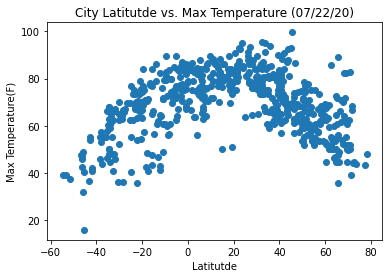

<Figure size 432x288 with 0 Axes>

In [9]:
#Creating scatter plot with desired parameters
plt.scatter(city_info['City Latitude'],city_info['Max Temperature'])
#adding x,y labels and title
plt.xlabel('Latitutde')
plt.ylabel('Max Temperature(F)')
plt.title('City Latitutde vs. Max Temperature (07/22/20)')
#Showing scatter plot
plt.show()
#Saving image as PNG
plt.savefig("lat_temp.png")

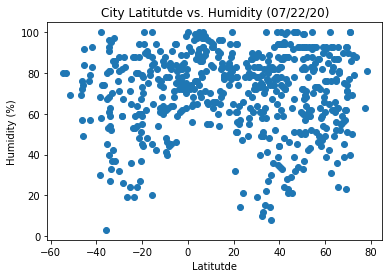

<Figure size 432x288 with 0 Axes>

In [10]:
#Creating scatter plot with desired parameters
plt.scatter(city_info['City Latitude'],city_info['Humidity'])
#adding x,y labels and title
plt.xlabel('Latitutde')
plt.ylabel('Humidity (%)')
plt.title('City Latitutde vs. Humidity (07/22/20)')
#Showing scatter plot
plt.show()
#Saving image as PNG
plt.savefig("lat_hum.png")

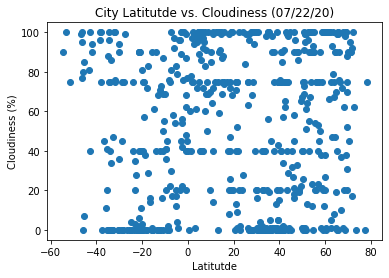

<Figure size 432x288 with 0 Axes>

In [11]:
#Creating scatter plot with desired parameters
plt.scatter(city_info['City Latitude'],city_info['Cloud Coverage'])
#adding x,y labels and title
plt.xlabel('Latitutde')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitutde vs. Cloudiness (07/22/20)')
#Showing scatter plot
plt.show()
#Saving image as PNG
plt.savefig("lat_cloud.png")

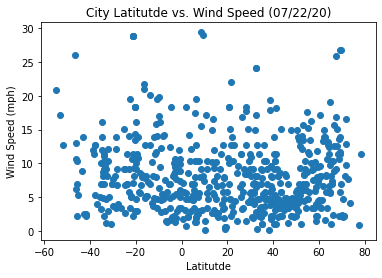

<Figure size 432x288 with 0 Axes>

In [12]:
#Creating scatter plot with desired parameters
plt.scatter(city_info['City Latitude'],city_info['Wind Speed'])
#adding x,y labels and title
plt.xlabel('Latitutde')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitutde vs. Wind Speed (07/22/20)')
#Showing scatter plot
plt.show()
#Saving image as PNG
plt.savefig("lat_wind.png")

In [22]:
#Breaking hempisheperes into northern and southern and putting the data into seperate data frames
north_df = city_info.loc[(city_info['City Latitude']> 0)]
south_df = city_info.loc[(city_info['City Latitude']< 0)]

The r-squared is: 0.3807758617844871


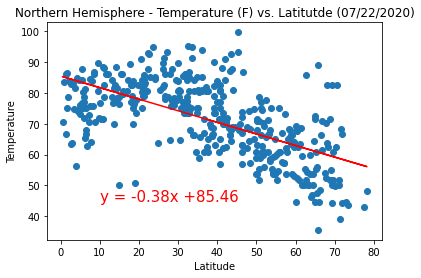

<Figure size 432x288 with 0 Axes>

In [23]:
#Setting variables for desired plotting parameters
x_values = north_df['City Latitude']
y_values = north_df['Max Temperature']
#Getting line regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#Formatting the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Creating plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#adding x,y labels, annotate line and title
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(10,45),fontsize=15,color="red")
plt.title("Northern Hemisphere - Temperature (F) vs. Latitutde (07/22/2020)")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()
#Saving image as PNG
plt.savefig("north_lat_temp.png")

The r-squared is: 0.46893287397147876


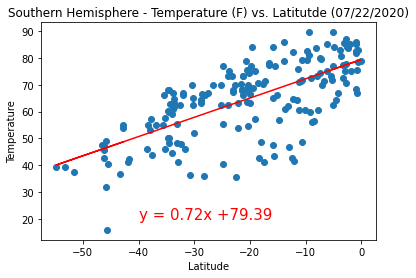

<Figure size 432x288 with 0 Axes>

In [24]:
#Setting variables for desired plotting parameters
x_values = south_df['City Latitude']
y_values = south_df['Max Temperature']
#Getting line regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#Formatting the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Creating plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#adding x,y labels, annotate line and title
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Temperature (F) vs. Latitutde (07/22/2020)")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()
#Saving image as PNG
plt.savefig("south_lat_temp.png")

The r-squared is: 0.025183941883893363


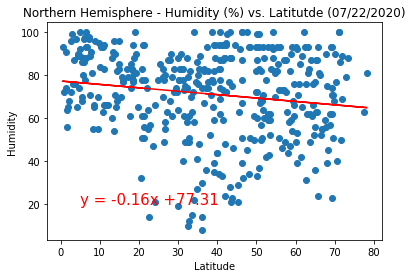

<Figure size 432x288 with 0 Axes>

In [25]:
#Setting variables for desired plotting parameters
x_values = north_df['City Latitude']
y_values = north_df['Humidity']
#Getting line regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#Formatting the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Creaitng plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#adding x,y labels, annotate line and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(5,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitutde (07/22/2020)")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()
#Saving image as PNG
plt.savefig("north_lat_hum.png")

The r-squared is: 0.015269230809084208


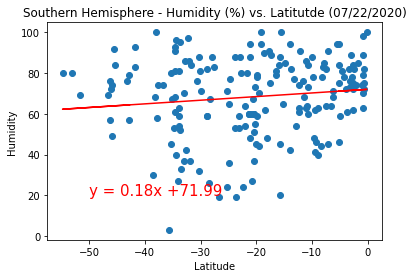

<Figure size 432x288 with 0 Axes>

In [26]:
#Setting variables for desired plotting parameters
x_values = south_df['City Latitude']
y_values = south_df['Humidity']
#Getting line regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#Formatting the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Creating plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#adding x,y labels, annotate line and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitutde (07/22/2020)")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()
#Saving image as PNG
plt.savefig("south_lat_hum.png")

The r-squared is: 0.006958985427243897


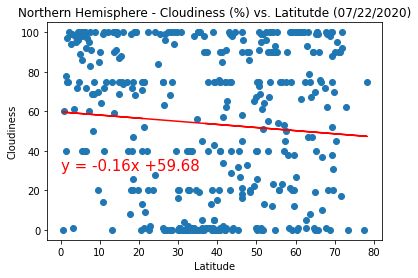

<Figure size 432x288 with 0 Axes>

In [27]:
#Setting variables for desired plotting parameters
x_values = north_df['City Latitude']
y_values = north_df['Cloud Coverage']
#Getting line regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#Formatting the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Creating plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#adding x,y labels, annotate line and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitutde (07/22/2020)")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()
#Saving image as PNG
plt.savefig("north_lat_cloud.png")

The r-squared is: 0.001427339006625281


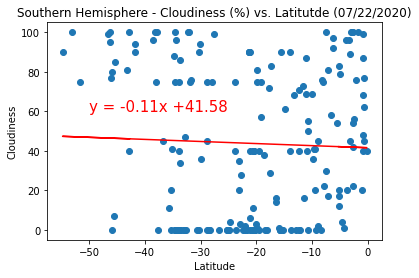

<Figure size 432x288 with 0 Axes>

In [28]:
#Setting variables for desired plotting parameters
x_values = south_df['City Latitude']
y_values = south_df['Cloud Coverage']
#Getting line regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#Formatting the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Creating plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#adding x,y labels, annotate line and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitutde (07/22/2020)")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()
#Saving image as PNG
plt.savefig("south_lat_cloud.png")

The r-squared is: 0.00548694403466471


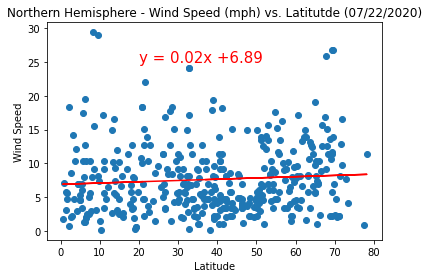

<Figure size 432x288 with 0 Axes>

In [29]:
#Setting variables for desired plotting parameters
x_values = north_df['City Latitude']
y_values = north_df['Wind Speed']
#Getting line regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#Formatting the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Creating plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#adding x,y labels, annotate line and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitutde (07/22/2020)")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()
#Saving image as PNG
plt.savefig("north_lat_wind.png")

The r-squared is: 0.010512239851502927


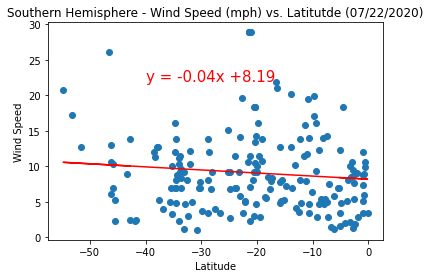

<Figure size 432x288 with 0 Axes>

In [30]:
#Setting variables for desired plotting parameters
x_values = south_df['City Latitude']
y_values = south_df['Wind Speed']
#Getting line regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#Formatting the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Creating plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#adding x,y labels, annotate line and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-40,22),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitutde (07/22/2020)")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()
#Saving image as PNG
plt.savefig("south_lat_wind.png")
